## Agenda

- How do I use the **pandas library** to read data into Python?
- How do I use the **seaborn library** to visualize data?
- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Scikit_learn/data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

C:\Users\Transorg\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


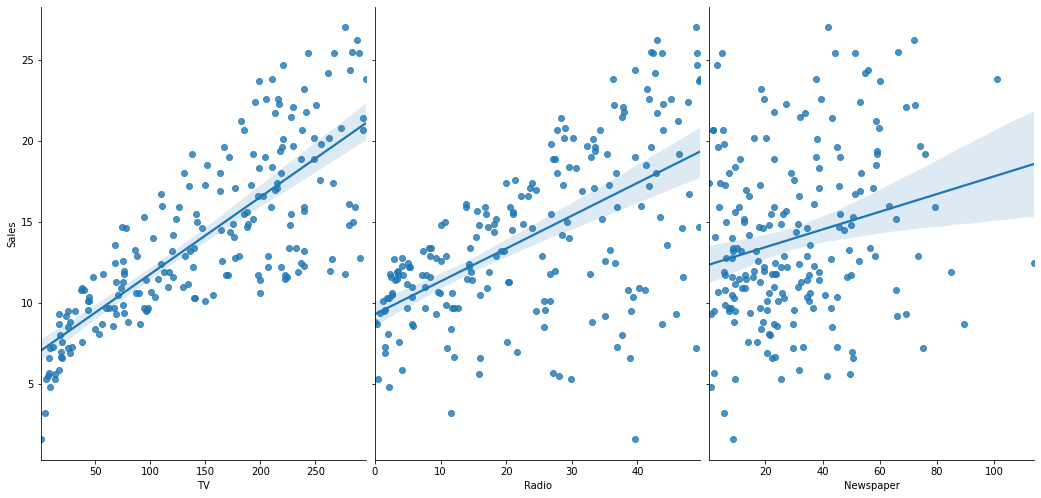

In [17]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [18]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()


y = data['Sales']

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [19]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [20]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [28]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [29]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179335
[0.04656457 0.17915812 0.00345046]


In [12]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.0034504647111804065)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [38]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [39]:
y_pred
len(y_pred)

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

50

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [40]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [41]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [42]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [43]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


<div style="color:red;">
Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
    </div>

### Computing the RMSE for our Sales predictions

In [44]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328961


In [46]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\Transorg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     395.0
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           7.84e-70
Time:                        17:06:32   Log-Likelihood:                -297.38
No. Observations:                 150   AIC:                             602.8
Df Residuals:                     146   BIC:                             614.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8770      0.368      7.822      0.000       2.150       3.604
TV             0.0466      0.002     27.873      0.000       0.043       0.050
Radio          0.1792      0.011     16.924      0.000       0.158       0.200
Newspaper      0.0035      0.008      0.458      0.647      -0.011       0.018
==============================================================================
Omnibus:                       41.940   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.319
Skew:                          -1.247   Prob(JB):                     4.90e-19
Kurtosis:                       5.696   Cond. No.                         433.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
import statsmodels.formula.api as smf

In [50]:
# read data into a DataFrame
data = pd.read_csv('Scikit_learn/data/Advertising.csv', index_col=0)
data.head()



,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [51]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Confidence in our Model

**Question:** Is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer:** Low variance/high bias. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [52]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [53]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [54]:

### STATSMODELS ###
# print the R-squared value for the model
lm1.rsquared

0.611875050850071

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the<p style="color:red;"> **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)</p>

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [55]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [64]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [65]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
zip(feature_cols, lm2.coef_)

LinearRegression()

How do we interpret the **Size_large coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'Size_small' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Features with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [69]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [70]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [71]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). <p style="color:red">In general, if you have a categorical feature with **k "levels", you create k-1 dummy variables.** </p>

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [72]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [73]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
zip(feature_cols, lm2.coef_)

LinearRegression()

In [77]:
dict(zip(feature_cols, lm2.coef_))

{'TV': 0.045744010363313735,
 'Radio': 0.18786669552525811,
 'Newspaper': -0.0010876977267108012,
 'Size_large': 0.0773966074974793,
 'Area_suburban': -0.10656299015958601,
 'Area_urban': 0.2681380216522008}

In [74]:
feature_cols, lm2.coef_

(['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban'],
 array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
         0.26813802]))

How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming features to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).